# *Convolutional Neural Network Project on the MNIST Dataset.* 

## Importing Libraries

In [2]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import load_model
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras. layers import Conv2D, MaxPooling2D
from keras import backend as K

import matplotlib.pyplot as plt

import random

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

## Visualizing Examples from Data

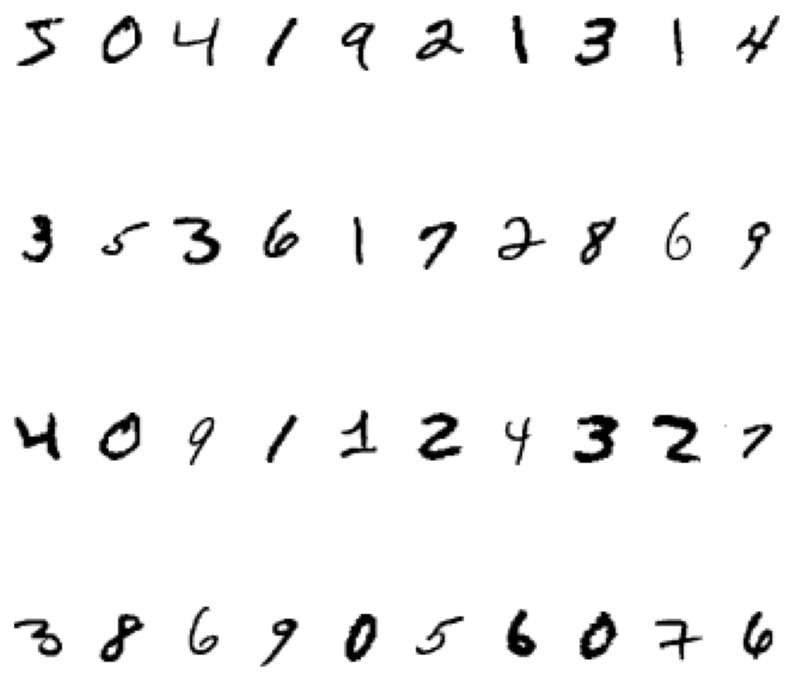

In [4]:
plt.figure(figsize=(14,14))
x, y = 10, 4 
for i in range(40):  
    plt.subplot(y, x, i+1)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.axis("off")
plt.show()

## Editing the Data

In [5]:
batch_size = 128 
num_classes = 10 
epochs = 6

img_rows, img_cols = 28, 28


if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [6]:
y_train_original = y_train.copy()
y_test_original = y_test.copy()
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

## Building the Model

In [7]:
model = Sequential() 

**Adding Layers**

In [8]:
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))

 
model.add(Conv2D(64, (3, 3), activation='relu'))


model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Dropout(0.25))


model.add(Flatten())


model.add(Dense(128, activation='relu'))

model.add(Dropout(0.5))


model.add(Dense(num_classes, activation='softmax'))

**Visualizing the Model Architecture**

In [9]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)              

In [10]:
model.compile(loss = "categorical_crossentropy",
             optimizer = keras.optimizers.Adadelta(),
             metrics = ['accuracy'])

## Training the Model

In [11]:
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/6
60000/60000 [==============================] - 63s 1ms/step - loss: 0.8400 - accuracy: 0.8633 - val_loss: 0.0727 - val_accuracy: 0.9786
Epoch 2/6
60000/60000 [==============================] - 62s 1ms/step - loss: 0.1309 - accuracy: 0.9628 - val_loss: 0.0587 - val_accuracy: 0.9817
Epoch 3/6
60000/60000 [==============================] - 69s 1ms/step - loss: 0.0894 - accuracy: 0.9744 - val_loss: 0.0470 - val_accuracy: 0.9855
Epoch 4/6
60000/60000 [==============================] - 66s 1ms/step - loss: 0.0671 - accuracy: 0.9804 - val_loss: 0.0398 - val_accuracy: 0.9879
Epoch 5/6
60000/60000 [==============================] - 66s 1ms/step - loss: 0.0587 - accuracy: 0.9833 - val_loss: 0.0330 - val_accuracy: 0.9893
Epoch 6/6
60000/60000 [==============================] - 65s 1ms/step - loss: 0.0508 - accuracy: 0.9849 - val_loss: 0.0371 - val_accuracy: 0.9895


## Evaluating and Saving the Model 

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


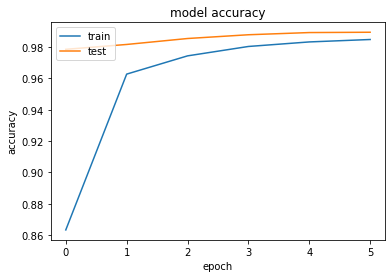

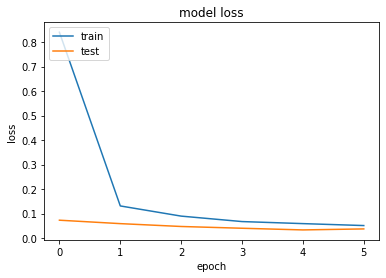

Test Loss: 0.03711229383587779
Test Accuracy: 0.9894999861717224


In [12]:
#list all data in history
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

score = model.evaluate(x_test, y_test, verbose=0)
print('Test Loss:', score[0])
print('Test Accuracy:', score[1])

In [13]:
model_test = model.save('save_models/mnist_model.h5')

## Testing the Model

**Testing a Random Input**

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

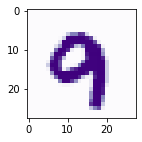

In [14]:
test_image = x_test[3200]
plt.figure(figsize=(2,2))
plt.imshow(test_image.reshape(28,28), cmap="Purples")
y_test[3200]

In [15]:
test_data = x_test[3200].reshape(1,28,28,1)
pre=model.predict(test_data, batch_size=1)
max = pre.max()
for i in range(10):
    if pre[0][i] == max:
        print(i)

9


**Testing over 100 Random Inputs from the Data**

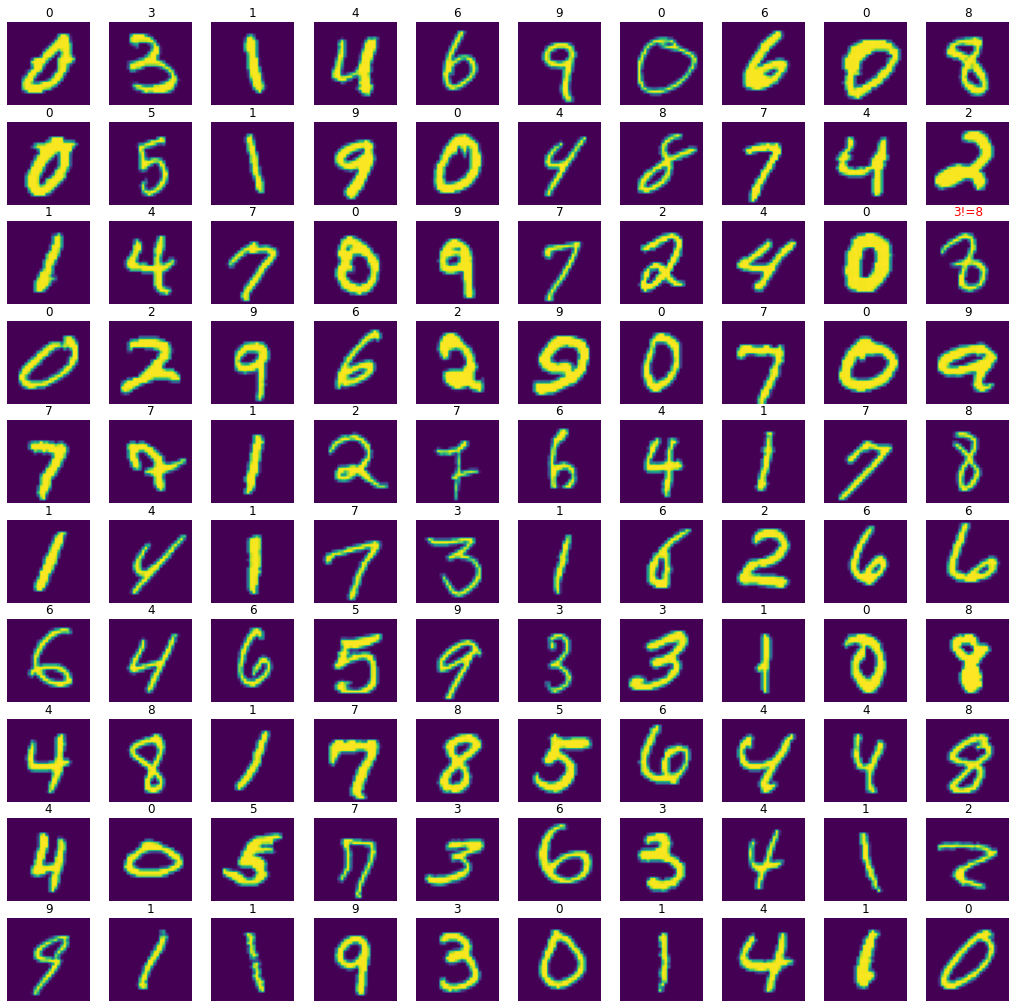

In [16]:
plt.figure(figsize=(18, 18))
true = 0
false = 0
number = 100

def result(prediction_values):
    max = prediction_values.max()
    for i in range(10):
        if prediction_values[0][i] == max:
            return i
            
for i in range(number):
    index = random.randint(0, x_test.shape[0])
    image = x_test[index].reshape(1, 28, 28, 1)
    predictions = model.predict(image, batch_size=1)
    
    plt.subplot(10, 10, i+1)
    plt.imshow(image.reshape(28,28))
    plt.axis('off')
    
    pred = result(predictions)
    plt.title(pred)
    
    if y_test_original[index] == pred:
        plt.title(pred, fontsize=12)
        true += 1
    else:
        #tahmin edilen sınıf != gerçek sınıf
        plt.title(str(pred) + "!=" + str(y_test_original[index]), color='#ff0000', fontsize=12)
        false += 1

In [17]:
plt.show()
print("Number of True Predictions:", true)
print("Number of False Predictions:", false)
print("Accuracy Rate:", (true/(false + true))*100, '%')

Number of True Predictions: 99
Number of False Predictions: 1
Accuracy Rate: 99.0 %
